In [1]:
import numpy as np
import sympy as sp
from sympy import *
from sympy import Matrix
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from numpy import linalg
import cmath
%matplotlib inline
from mpl_toolkits import mplot3d
import time
import numba
from numba import jit

In [2]:
import nbimporter
import Functions_Hofstatder as Fun_Hof

Importing Jupyter notebook from Functions_Hofstatder.ipynb


In [3]:
Lx = 30
Ly = 30

p = 1
q = 3
J = 1
tx = J
ty = J

positions_x = np.arange(0,Lx,1)
positions_y = np.arange(0,Ly,1)
x, y = np.meshgrid(range(Lx+1),range(Ly+1))

eigValues,eigVectors = linalg.eigh(Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly))   

number = np.arange(0,Lx*Ly,1)
E_F = -1.5*np.ones(len(number))

In [4]:
s = 6 # to select as many edge states as wanted. Can be changed to get an overlap with delta-function around 0.8
l1 = np.arange(int(Lx*Ly/q)-s-4,int(Lx*Ly/q)+s,1)    # to select the edgestates/eigenvectors in the eigVectors matrix
l2 = np.arange(int((q-1)*Lx*Ly/q)-s,int((q-1)*Lx*Ly/q)+s+4,1) 
edgeStates_gap1 = 1j*np.zeros((len(l1),Lx,Lx))
edgeStates_gap2 = 1j*np.zeros((len(l2),Lx,Lx))

In [5]:
k = 0
for i in l1:
    edgeStates_gap1[k] = Fun_Hof.vector2matrix(eigVectors[:,i])
    k += 1

k = 0    
for i in l2:
    edgeStates_gap2[k] = Fun_Hof.vector2matrix(eigVectors[:,i])
    k += 1

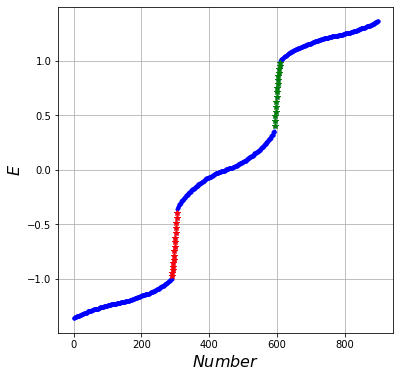

In [6]:
fig_E_square = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)
ax1.plot(eigValues.real/2/J,'b.',label='$k_y = 1$')
for i in l1:
    ax1.plot(i,eigValues[i].real/2/J,'r*',label='$l_1 = 300$')
for i in l2:
    ax1.plot(i,eigValues[i].real/2/J,'g*',label='$l_2 = 600$')
ax1.set_xlabel('$Number$',Fontsize=16)
ax1.set_ylabel('$E$',Fontsize=16)
ax1.grid(axis='both')

In [7]:
fig_E_square.savefig("spectrum_square.png")

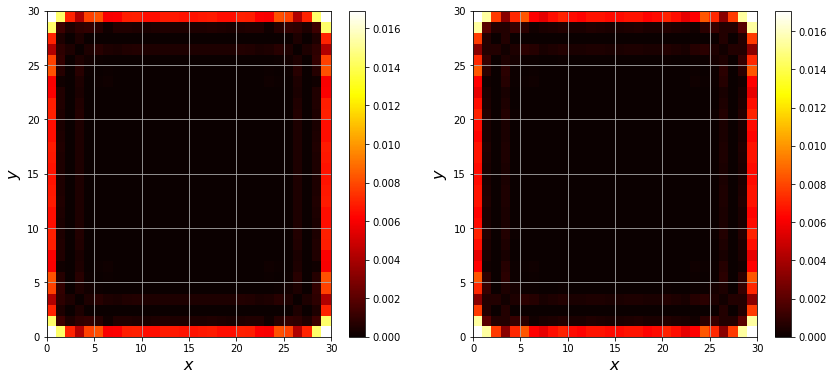

In [8]:
fig_E_square2 = pyplot.figure(figsize=(14,6))

ax2 = pyplot.subplot(121)
im = ax2.pcolormesh(x,y,abs(edgeStates_gap1[int(len(edgeStates_gap1)/2)-6])**2,cmap='hot',vmin=0.,linewidth=0,rasterized=True)
fig_E_square2.colorbar(im, ax=ax2)
ax2.set_xlabel('$x$',Fontsize=16)
ax2.set_ylabel('$y$',Fontsize=16)
ax2.grid(axis='both')

ax3 = pyplot.subplot(122)
im = ax3.pcolormesh(x,y,abs(edgeStates_gap2[int(len(edgeStates_gap2)/2)+s])**2,cmap='hot',vmin=0.,linewidth=0,rasterized=True)
fig_E_square2.colorbar(im, ax=ax3)
ax3.set_xlabel('$x$',Fontsize=16)
ax3.set_ylabel('$y$',Fontsize=16)
ax3.grid(axis='both')

In [9]:
fig_E_square2.savefig("edge_square2.png")

# Evolution

In [10]:
from scipy import linalg

## Overlap with $\delta$-function

In [11]:
psi_0 = 1j*np.zeros((Lx*Ly))
psi_0[-1] = 1

t1 = 0
psi_t1 = np.dot(linalg.expm(-1j*t1*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_0)
psi_t1 = Fun_Hof.vector2matrix(psi_t1)

t2 = 10
psi_t2 = np.dot(linalg.expm(-1j*t2*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_0)
psi_t2 = Fun_Hof.vector2matrix(psi_t2)

print('50 % done')

t3 = 20
psi_t3 = np.dot(linalg.expm(-1j*t3*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_0)
psi_t3 = Fun_Hof.vector2matrix(psi_t3)

t4 = 40
psi_t4 = np.dot(linalg.expm(-1j*t4*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_0)
psi_t4 = Fun_Hof.vector2matrix(psi_t4)

print('100 % done')

50 % done
100 % done


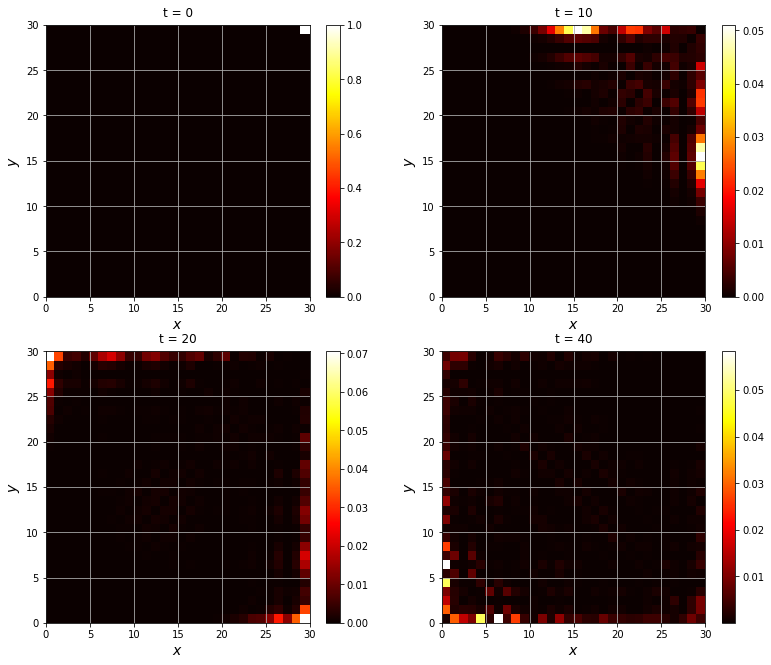

In [12]:
fig_delta = pyplot.figure(figsize=(13,11))
ax1 = pyplot.subplot(221)
im = ax1.pcolormesh(x,y,abs(psi_t1)**2,cmap='hot',linewidth=0,rasterized=True)
fig_delta.colorbar(im, ax=ax1)
ax1.set_xlabel('$x$',Fontsize=14)
ax1.set_ylabel('$y$',Fontsize=14)
ax1.grid(axis='both')
ax1.text(0.5,+1.03, "t = {:d}".format(t1), size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = pyplot.subplot(222)
im = ax2.pcolormesh(x,y,abs(psi_t2)**2,cmap='hot',linewidth=0,rasterized=True)
fig_delta.colorbar(im, ax=ax2)
ax2.set_xlabel('$x$',Fontsize=14)
ax2.set_ylabel('$y$',Fontsize=14)
ax2.grid(axis='both')
ax2.text(2,+1.03, "t = {:d}".format(t2), size=12, ha="center", 
         transform=ax1.transAxes)

ax3 = pyplot.subplot(223)
im = ax3.pcolormesh(x,y,abs(psi_t3)**2,cmap='hot',linewidth=0,rasterized=True)
fig_delta.colorbar(im, ax=ax3)
ax3.set_xlabel('$x$',Fontsize=14)
ax3.set_ylabel('$y$',Fontsize=14)
ax3.grid(axis='both')
ax3.text(0.5,-0.17, "t = {:d}".format(t3), size=12, ha="center", 
         transform=ax1.transAxes)

ax4 = pyplot.subplot(224)
im = ax4.pcolormesh(x,y,abs(psi_t4)**2,cmap='hot',linewidth=0,rasterized=True)
fig_delta.colorbar(im, ax=ax4)
ax4.set_xlabel('$x$',Fontsize=14)
ax4.set_ylabel('$y$',Fontsize=14)
ax4.grid(axis='both')
ax4.text(2,-0.17, "t = {:d}".format(t4), size=12, ha="center", 
         transform=ax1.transAxes);

In [13]:
fig_delta.savefig("fig_delta.png")

## Comparison of velocities with the cylindrical case at $k_y = $ for edge states

In [11]:
start = time.time()
p = 1
q = 3

Lx = 200
Ly = 192
Phi = 0

dky = 2*np.pi/Ly
ky_list = np.arange(-np.pi,np.pi,dky)

eigValues = 1j*np.zeros((Lx,len(ky_list)))

j = 0
for ky in ky_list:        
    eigValues[:,j] = linalg.eigh(Fun_Hof.H_Hofstatder_cylind(Lx,Ly,ky,p,q,Phi))[0]
                    
    j += 1

print("Execution time:",time.time()-start,"secondes")

Execution time: 4.44677996635437 secondes


In [12]:
E = Symbol('E')

p = 1
q = 3

Phi = 0

Ly = 192
dky = 2*np.pi/Ly

ky_list = np.arange(-np.pi,np.pi,dky)
#ky_list = np.arange(0,2*np.pi,dky)

eigValues_edge = 1j*np.zeros((len(ky_list),q-1))
i = 0

start = time.time()

for ky in ky_list:
    eigValues_edge[i,:] = Fun_Hof.En_edge(E,ky,p,q,Ly,Phi) # the ":" stands for registering the 2 energies you get from the transfer matrix method.
                                                            # The first one is for the lower gap, the second one for the upper gap.
    i += 1
    
print("Execution time:",time.time()-start,"secondes")

Execution time: 33.69168519973755 secondes


## Overlap with Gaussian function

In [14]:
x0 = 0
y0 = 30
ky = 1
sigma = 1

Lx = 30
Ly = 30

gauss_state = Fun_Hof.Gauss_init(Lx,Ly,x0,y0,ky,sigma)
gauss_state = gauss_state/np.sqrt(sum(sum(abs(gauss_state)**2)))

In [15]:
psi_01 = 1j*np.zeros((Lx,Ly))
for n in range(len(l1)):
    psi_01 += sum(sum(Fun_Hof.overlap(gauss_state,edgeStates_gap1[n])))*edgeStates_gap1[n]
psi_01 = Fun_Hof.matrix2vector(psi_01)
psi_01 = psi_01/np.sqrt(np.vdot(psi_01,psi_01))

psi_02 = 1j*np.zeros((Lx,Ly))
for n in range(len(l2)):
    psi_02 += sum(sum(Fun_Hof.overlap(gauss_state,edgeStates_gap2[n])))*edgeStates_gap2[n]
psi_02 = Fun_Hof.matrix2vector(psi_02)
psi_02 = psi_02/np.sqrt(np.vdot(psi_02,psi_02))

In [16]:
# gap 1
t1 = 0
psi_t11 = np.dot(linalg.expm(-1j*t1*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_01)
psi_t11 = psi_t11/np.sqrt(np.vdot(psi_t11,psi_t11))
psi_t11 = Fun_Hof.vector2matrix(psi_t11)

t2 = 10
psi_t21 = np.dot(linalg.expm(-1j*t2*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_01)
psi_t21 = psi_t21/np.sqrt(np.vdot(psi_t21,psi_t21))
psi_t21 = Fun_Hof.vector2matrix(psi_t21)

print('50 % done')

t3 = 40
psi_t31 = np.dot(linalg.expm(-1j*t3*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_01)
psi_t31 = psi_t31/np.sqrt(np.vdot(psi_t31,psi_t31))
psi_t31 = Fun_Hof.vector2matrix(psi_t31)

t4 = 50
psi_t41 = np.dot(linalg.expm(-1j*t4*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_01)
psi_t41 = psi_t41/np.sqrt(np.vdot(psi_t41,psi_t41))
psi_t41 = Fun_Hof.vector2matrix(psi_t41)

print('100 % done')

50 % done
100 % done


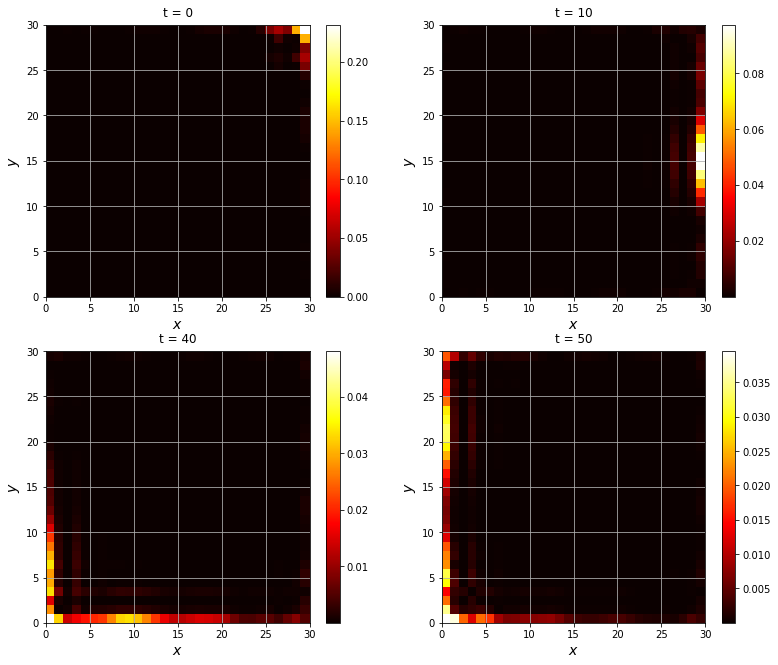

In [17]:
fig_gauss1 = pyplot.figure(figsize=(13,11))
ax1 = pyplot.subplot(221)
im = ax1.pcolormesh(x,y,abs(psi_t11)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss1.colorbar(im, ax=ax1)
ax1.set_xlabel('$x$',Fontsize=14)
ax1.set_ylabel('$y$',Fontsize=14)
ax1.grid(axis='both')
ax1.text(0.5,1.03, "t = {:d}".format(t1), size=12, ha="center", 
         transform=ax1.transAxes);

ax2 = pyplot.subplot(222)
im = ax2.pcolormesh(x,y,abs(psi_t21)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss1.colorbar(im, ax=ax2)
ax2.set_xlabel('$x$',Fontsize=14)
ax2.set_ylabel('$y$',Fontsize=14)
ax2.grid(axis='both')
ax2.text(2,+1.03, "t = {:d}".format(t2), size=12, ha="center", 
         transform=ax1.transAxes)

ax3 = pyplot.subplot(223)
im = ax3.pcolormesh(x,y,abs(psi_t31)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss1.colorbar(im, ax=ax3)
ax3.set_xlabel('$x$',Fontsize=14)
ax3.set_ylabel('$y$',Fontsize=14)
ax3.grid(axis='both')
ax3.text(0.5,-0.17, "t = {:d}".format(t3), size=12, ha="center", 
         transform=ax1.transAxes)

ax4 = pyplot.subplot(224)
im = ax4.pcolormesh(x,y,abs(psi_t41)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss1.colorbar(im, ax=ax4)
ax4.set_xlabel('$x$',Fontsize=14)
ax4.set_ylabel('$y$',Fontsize=14)
ax4.grid(axis='both')
ax4.text(2,-0.17, "t = {:d}".format(t4), size=12, ha="center", 
         transform=ax1.transAxes);

In [ ]:
fig_gauss1.savefig("fig_gauss1.png")

In [ ]:
# gap 2
t1 = 0
psi_t12 = np.dot(linalg.expm(-1j*t1*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_02)
psi_t12 = psi_t12/np.sqrt(np.vdot(psi_t12,psi_t12))
psi_t12 = Fun_Hof.vector2matrix(psi_t12)

t2 = 10
psi_t22 = np.dot(linalg.expm(-1j*t2*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_02)
psi_t22 = psi_t22/np.sqrt(np.vdot(psi_t22,psi_t22))
psi_t22 = Fun_Hof.vector2matrix(psi_t22)

print('50 % done')

t3 = 40
psi_t32 = np.dot(linalg.expm(-1j*t3*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_02)
psi_t32 = psi_t32/np.sqrt(np.vdot(psi_t32,psi_t32))
psi_t32 = Fun_Hof.vector2matrix(psi_t32)

t4 = 60
psi_t42 = np.dot(linalg.expm(-1j*t4*Fun_Hof.H_Hofstatder_square(tx,ty,p,q,positions_x,positions_y,Lx,Ly)),psi_02)
psi_t42 = psi_t42/np.sqrt(np.vdot(psi_t42,psi_t42))
psi_t42 = Fun_Hof.vector2matrix(psi_t42)
print('100 % done')

In [ ]:
fig_gauss2 = pyplot.figure(figsize=(13,11))
ax1 = pyplot.subplot(221)
im = ax1.pcolormesh(x,y,abs(psi_t12)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss2.colorbar(im, ax=ax1)
ax1.set_xlabel('$x$',Fontsize=14)
ax1.set_ylabel('$y$',Fontsize=14)
ax1.grid(axis='both')
ax1.text(0.5,1.03, "t = {:d}".format(t1), size=12, ha="center", 
         transform=ax1.transAxes);

ax2 = pyplot.subplot(222)
im = ax2.pcolormesh(x,y,abs(psi_t22)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss2.colorbar(im, ax=ax2)
ax2.set_xlabel('$x$',Fontsize=14)
ax2.set_ylabel('$y$',Fontsize=14)
ax2.grid(axis='both')
ax2.text(2,+1.03, "t = {:d}".format(t2), size=12, ha="center", 
         transform=ax1.transAxes)

ax3 = pyplot.subplot(223)
im = ax3.pcolormesh(x,y,abs(psi_t32)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss2.colorbar(im, ax=ax3)
ax3.set_xlabel('$x$',Fontsize=14)
ax3.set_ylabel('$y$',Fontsize=14)
ax3.grid(axis='both')
ax3.text(0.5,-0.17, "t = {:d}".format(t3), size=12, ha="center", 
         transform=ax1.transAxes)

ax4 = pyplot.subplot(224)
im = ax4.pcolormesh(x,y,abs(psi_t42)**2,cmap='hot',linewidth=0,rasterized=True)
fig_gauss2.colorbar(im, ax=ax4)
ax4.set_xlabel('$x$',Fontsize=14)
ax4.set_ylabel('$y$',Fontsize=14)
ax4.grid(axis='both')
ax4.text(2,-0.17, "t = {:d}".format(t4), size=12, ha="center", 
         transform=ax1.transAxes);

In [49]:
fig_gauss2.savefig("fig_gauss2.png")